# ML Avanti Bootcamp - Projeto de Detecção Facial - ETAPA 1

### Visão Geral

O dataset [Face-Detection](https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset), disponível no Kaggle foi criado pelo Engenheiro de Machine Learning Fares Elmenshawii como um conjunto de imagens para detecção de faces em imagens, com anotações de *bounding boxes* em formato padrão e em formato YOLO para cada face presente.

Ao todo são **16.733 imagens** com seus respectivos arquivos de anotação. As imagens foram coletadas a partir do *Google Open Images* usando o toolkit OIDv4, e o foco é exclusivamente em tarefas de **detecção de faces**, com qualidade de imagem adequada para treinar modelos de visão computacional baseados em aprendizado profundo.

### Objetivo

Analisar de forma detalhada o dataset [Face-Detection](https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset), verificando a integridade dos arquivos, a consistência dos metadados, a qualidade das imagens, a distribuição das classes e a presença de duplicatas.

### Sumário

[1. Importação do Dataset](#scrollTo=axOEqj_HwGip&line=1&uniqifier=1) <br >
[2. Dataframe com os Metadados das Imagens e Verificações Iniciais](#scrollTo=jGYXNDsfwO1t&line=1&uniqifier=1) <br >
[3. Integridade dos Arquivos](#scrollTo=dFHSpTrMwWOt&line=2&uniqifier=1) <br >
[4. Consistência dos Metadados](#scrollTo=N_hiKSVnwau6&line=1&uniqifier=1) <br >
[5. Qualidade das Imagens](#scrollTo=Zy_eyNIHwpN6&line=1&uniqifier=1) <br >
[6. Distribuição das Classes](#scrollTo=kfIk-4b9wkBo&line=1&uniqifier=1) <br >
[7. Verificação de Imagens Duplicadas](#scrollTo=qjhAzgJTw1y0&line=1&uniqifier=1)



---



<a id="scrollTo=axOEqj_HwGip&line=1&uniqifier=1"></a>

### 1. Importação do Dataset

In [ ]:
#Importação das bibliotecas

!pip install opendatasets
!pip -q install pillow
!pip install imagehash

import opendatasets as od
import pandas as pd
import cv2
import os
import random
import imagehash
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, UnidentifiedImageError

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
#Importação do Dataset
od.download("https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset/dat")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Lim@1207
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset


100%|██████████| 4.43G/4.43G [01:03<00:00, 74.4MB/s]


In [ ]:
!ls

face-detection-dataset	sample_data


<a id="scrollTo=jGYXNDsfwO1t&line=1&uniqifier=1"></a>

### 2. Dataframe com os Metadados das Imagens e Verificações Iniciais

In [ ]:
#Variáveis contendo os paths dos diretórios do dataset

root_dir = './face-detection-dataset/images'
print(root_dir)

train_images = os.listdir('./face-detection-dataset/images/train')
val_images = os.listdir('./face-detection-dataset/images/val')

train_labels = os.listdir('./face-detection-dataset/labels/train')
val_labels = os.listdir('./face-detection-dataset/labels/val')

./face-detection-dataset/images


In [ ]:
#Conferência da quantidade de imagens e labels em treino e validação

print("=== IMAGENS ===")
print("Treino:", len(train_images))
print("Validação:", len(val_images))

print("\n=== LABELS ===")
print("Treino:", len(train_labels))
print("Validação:", len(val_labels))

=== IMAGENS ===
Treino: 13386
Validação: 3347

=== LABELS ===
Treino: 13386
Validação: 3347


In [ ]:
#Conferência de imagens sem label

#Treino
missing_labels = []

for img in train_images:
    label_name = img.replace('.jpg', '.txt')
    if label_name not in train_labels:
        missing_labels.append(img)

print("Imagens treino sem label:", len(missing_labels))

#Validação
missing_labels = []

for img in val_images:
    label_name = img.replace('.jpg', '.txt')
    if label_name not in val_labels:
        missing_labels.append(img)

print("Imagens validação sem label:", len(missing_labels))


Imagens treino sem label: 0
Imagens validação sem label: 0


In [ ]:
#Verifica labels de treino sem imagem

orphan_labels = []

for label in train_labels:
    img_name = label.replace('.txt', '.jpg')
    if img_name not in train_images:
        orphan_labels.append(label)

print("Labels treino sem imagem:", len(orphan_labels))


Labels treino sem imagem: 0


In [ ]:
#Validação do formato Yolo
#0 x_center y_center width height

def check_yolo_values(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            values = list(map(float, line.strip().split()))
            coords = values[1:]
            if any(v < 0 or v > 1 for v in coords):
                return False
    return True

#Testar algumas labels
for label in train_labels[:20]:
    path = './face-detection-dataset/labels/train/' + label
    if not check_yolo_values(path):
      print("Erro encontrado em:", label)

    else:
      print("Nenhum erro encontrado.")



Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.
Nenhum erro encontrado.


In [ ]:
#Visualização teste

def visualize_sample(image_dir, label_dir, image_name):

    #Caminhos
    img_path = os.path.join(image_dir, image_name)
    label_path = os.path.join(label_dir, image_name.replace('.jpg', '.txt'))

    #Ler imagem
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, _ = img.shape

    #Verificar se existe label
    if not os.path.exists(label_path):
        print("Label não encontrada para:", image_name)
        return

    #Ler anotações
    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        values = list(map(float, line.strip().split()))
        class_id, x_center, y_center, width, height = values

        #Converter YOLO → pixel
        x_center *= w
        y_center *= h
        width *= w
        height *= h

        xmin = int(x_center - width / 2)
        ymin = int(y_center - height / 2)
        xmax = int(x_center + width / 2)
        ymax = int(y_center + height / 2)

        #Desenhar bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

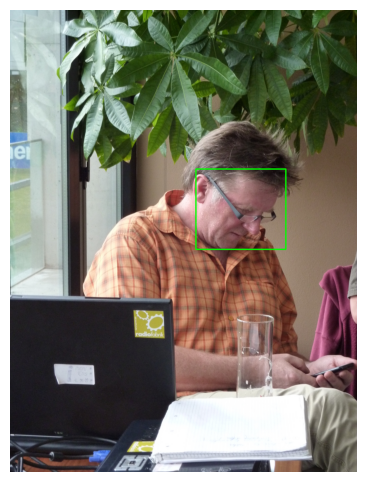

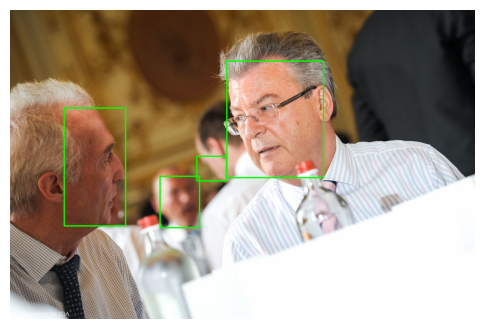

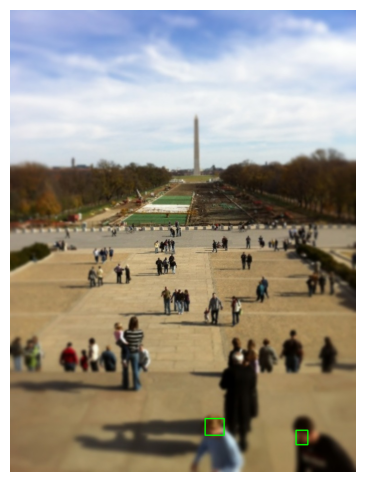

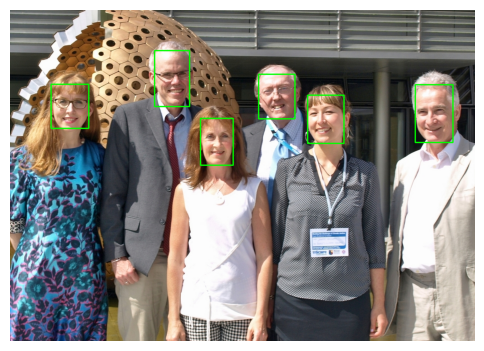

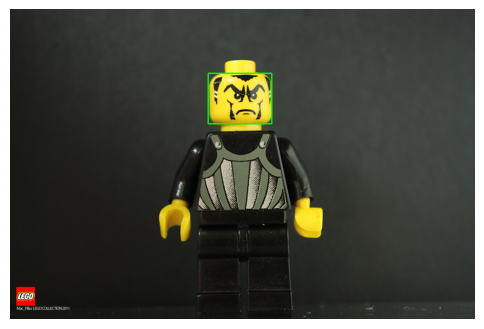

In [ ]:
#Visualizar bounding box

#Imagens de treino
train_img_dir = './face-detection-dataset/images/train'
train_label_dir = './face-detection-dataset/labels/train'

#Escolher 5 imagens aleatórias
sample_images = random.sample(os.listdir(train_img_dir), 5)

for img_name in sample_images:
    visualize_sample(train_img_dir, train_label_dir, img_name)

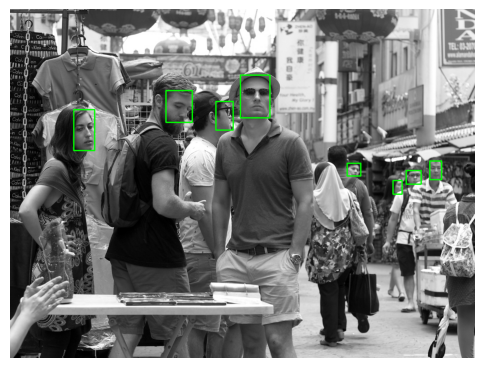

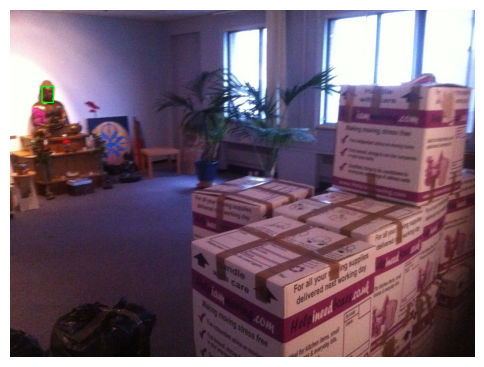

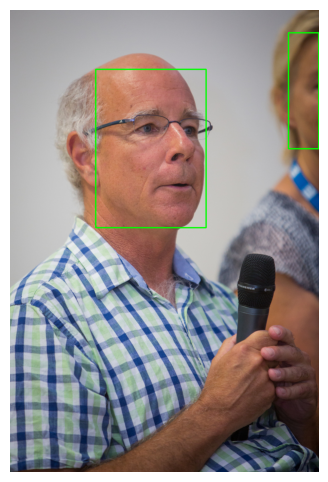

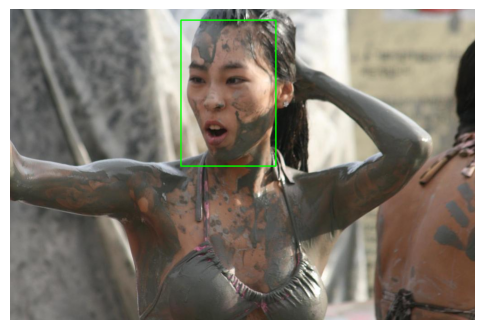

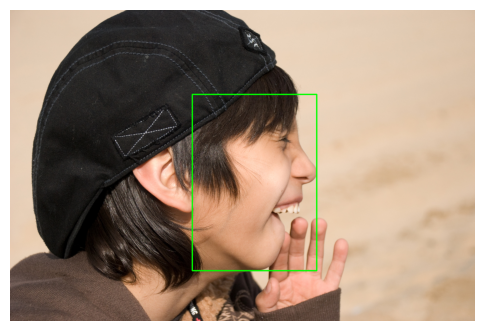

In [ ]:
#Imagens de validação
val_img_dir = './face-detection-dataset/images/val'
val_label_dir = './face-detection-dataset/labels/val'

#Escolher 5 imagens aleatórias
sample_images = random.sample(os.listdir(val_img_dir), 5)

for img_name in sample_images:
    visualize_sample(val_img_dir, val_label_dir, img_name)


In [ ]:
#Contagem de imagens corrompidas

count_corrupted = 0
corrupted = list()

In [ ]:
dataframe_list = list()
for folder in os.listdir(root_dir):
  child_dir = os.path.join(root_dir, folder)

  for image in os.listdir(child_dir):
    img_dir = os.path.join(child_dir, image)
    _, image_format = image.split('.')
    image_format = image_format.lower()
    img = cv2.imread(img_dir)


    if img is not None:
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #Converter a imagem OpenCV para uma imagem do Pillow
      img_pil = Image.fromarray(img_rgb)

      #Gerar o hash da imagem (usando perceptual hash como exemplo)
      img_hash = imagehash.phash(img_pil)
      width, height, channels = img.shape
      img_corrupted = False
    else:
      count_corrupted += 1
      corrupted.append(img_dir)
      img_corrupted = True
      img_hash, image_format, width, height, channels = None, None, None, None, None

    dataframe_list.append([img_dir, img_corrupted, img_hash, image_format, width, height, channels, folder])

In [ ]:
print(f'Total de Imagens Corrompidas: {count_corrupted}\nImagens corrompidas {corrupted}')

Total de Imagens Corrompidas: 0
Imagens corrompidas []


In [ ]:
df = pd.DataFrame(columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'], data = dataframe_list)

In [ ]:
df.head()

,image_path,corrupted,image_hash,image_format,width,height,channels,label
0,./face-detection-dataset/images/val/e2a6092ea3...,False,cc3933499cc93eb4,jpg,768,1024,3,val
1,./face-detection-dataset/images/val/d7d328ed5b...,False,df8b07c0d0be661a,jpg,1024,1024,3,val
2,./face-detection-dataset/images/val/d3be87d976...,False,db9f18d007e6a21e,jpg,678,1024,3,val
3,./face-detection-dataset/images/val/f32981bf79...,False,cab5873964248ff8,jpg,682,1024,3,val
4,./face-detection-dataset/images/val/df4a17ce54...,False,8017693ec4e33ceb,jpg,682,1024,3,val


<a id="scrollTo=dFHSpTrMwWOt&line=2&uniqifier=1"></a>

### 3. Integridade dos Arquivos


In [ ]:
#Informações estatísticas dos valores de altura, largura e canais das imagens

df.describe().loc[['mean', 'std', 'min', 'max']]

,width,height,channels
mean,806.545867,950.27395,3.0
std,160.886651,151.54427,0.0
min,270.000000,279.00000,3.0
max,3968.000000,4608.00000,3.0


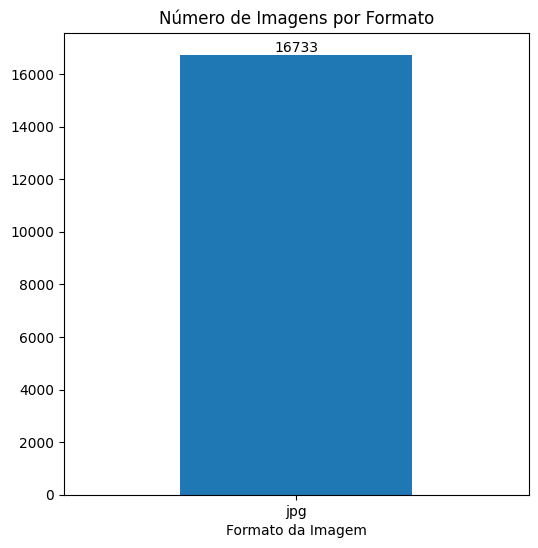

In [ ]:
#Quantidade de Imagens por formato

#Geração do gráfico de barras
ax = df['image_format'].value_counts().plot(kind='bar', title='Número de Imagens por Formato', figsize=(6, 6))

#Rotacionando os rótulos no eixo X
plt.xticks(rotation=0)

#Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

#Exibindo o gráfico
plt.xlabel('Formato da Imagem')
plt.show()

<a id="scrollTo=N_hiKSVnwau6&line=1&uniqifier=1"></a>

### 4. Consistência dos Metadados

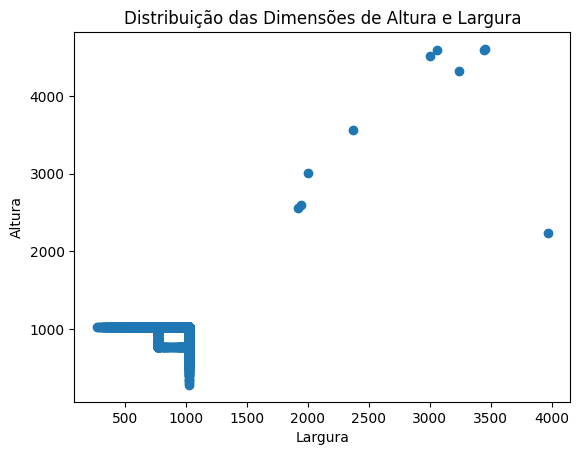

In [ ]:
#Distribuição das Dimensões de Altura e Largura das Imagens

plt.scatter(df['width'], df['height'])
plt.xlabel('Largura')
plt.ylabel('Altura')
plt.title('Distribuição das Dimensões de Altura e Largura')
plt.show()

In [ ]:
#Quantidade de informações nulas

df.isnull().sum()

,0
image_path,0
corrupted,0
image_hash,0
image_format,0
width,0
height,0
channels,0
label,0


<a id="scrollTo=Zy_eyNIHwpN6&line=1&uniqifier=1"></a>

### 5. Qualidade das Imagens

In [ ]:
#Verificação da Qualidade das Imagens

def eh_imagem_corrompida(caminho):

    if not isinstance(caminho, str) or caminho.strip() == "" or caminho.strip().lower() == "nan":
        return True

    if not os.path.exists(caminho):
        return True

    if os.path.getsize(caminho) == 0:
        return True

    try:
        with Image.open(caminho) as img:
            img.verify()
    except (UnidentifiedImageError, OSError, ValueError):
        return True

    img_cv = cv2.imread(caminho)
    if img_cv is None:
        return True

    try:
        if img_cv.ndim == 3 and img_cv.shape[2] >= 3:
            _ = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    except Exception:
        return True

    return False

if "df" not in globals():
    raise RuntimeError("Não achei o DataFrame 'df'. Rode as células anteriores até criar o df.")

if "image_path" not in df.columns:
    raise RuntimeError("Não achei a coluna 'image_path' no df. Confira onde está o caminho das imagens.")

df["corrupted_q5"] = [eh_imagem_corrompida(p) for p in df["image_path"].tolist()]

count_corrupted_q5 = int(df["corrupted_q5"].sum())
corrupted_q5 = df.loc[df["corrupted_q5"], "image_path"].tolist()

print("Total com problema (corrupted_q5=True):", count_corrupted_q5)
print("Exemplos (até 10):")
for p in corrupted_q5[:10]:
    print("-", p)


Total com problema (corrupted_q5=True): 0
Exemplos (até 10):


<a id="scrollTo=kfIk-4b9wkBo&line=1&uniqifier=1"></a>

### 6. Distribuição das Classes

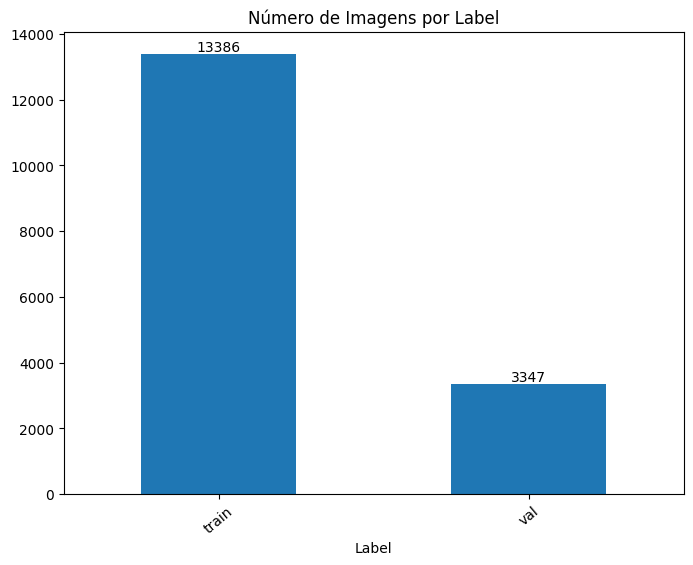

In [ ]:
#Verificação da Distribuição das Classes

ax = df['label'].value_counts().plot(kind='bar', title='Número de Imagens por Label', figsize=(8,6))

plt.xticks(rotation=40)

for p in ax.patches:
  ax.annotate(str(int(p.get_height())),
              (p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom', fontsize=10)

plt.xlabel('Label')
plt.show()

<a id="scrollTo=qjhAzgJTw1y0&line=1&uniqifier=1"></a>

### 7. Verificação de Imagens Duplicadas

In [ ]:
#Quantidade de imagens duplicadas

df['image_hash'].duplicated().sum()

np.int64(0)

In [ ]:
#Imagens duplicadas

df_duplicated = df[df['image_hash'].duplicated()]
df_duplicated

,image_path,corrupted,image_hash,image_format,width,height,channels,label,corrupted_q5


In [ ]:
#Imagens correspondentes a cada imagem duplicada

duplicated_images = {}
for i in range(df_duplicated.shape[0]):
  hash_duplicated = df_duplicated.iloc[i]['image_hash']
  duplicated = df[df['image_hash'] == hash_duplicated]["image_path"].values
  duplicated_images[str(hash_duplicated)] = duplicated.tolist()

duplicated_images

{}

In [ ]:
#Verificar hashes com mais de uma imagem
duplicated_groups = df[df.duplicated('image_hash', keep=False)] \
                        .groupby('image_hash')['image_path'] \
                        .apply(list)

for hash_value, paths in duplicated_groups.items():

    if len(paths) >= 2:
        image1 = cv2.imread(paths[0])
        image2 = cv2.imread(paths[1])

        #Converter de BGR (formato OpenCV) para RGB (formato Matplotlib)
        image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        #Mostrar a primeira imagem
        axes[0].imshow(image1_rgb)
        axes[0].axis('off')
        axes[0].set_title(f'Original\n{paths[0].split("/")[-1]}')

        #Mostrar a segunda imagem
        axes[1].imshow(image2_rgb)
        axes[1].axis('off')
        axes[1].set_title(f'Duplicada\n{paths[1].split("/")[-1]}')

        #Exibir as imagens
        plt.suptitle(f'Hash: {hash_value}')
        plt.tight_layout()
        plt.show()


In [ ]:
#Agrupando duplicatas por classe
duplicates_by_class = df_duplicated.groupby('label').size()

#Validação de arquivos duplicados
if not duplicates_by_class.empty:

    ax = duplicates_by_class.plot(
        kind='bar',
        title='Number of duplicates per class',
        figsize=(8, 6)
    )

    #Adicionando valores nas barras
    for p in ax.patches:
        ax.annotate(
            str(int(p.get_height())),
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            xytext=(0, 3),
            textcoords='offset points'
        )

    plt.xticks(rotation=40)
    plt.tight_layout()
    plt.show()

else:
    print("Não foram detectados arquivos duplicados.")

Não foram detectados arquivos duplicados.
